# Check ICA
The main purpose of the code in this notebook is to:
1) preprocess the raw data (high and low pass filter, exclude bad channels, interpolate bad channels)
2) save epochs to disk without removing noise components
3) identify noise components in the ICA solutions generated in 'run_ica.py'
4) removing noise components and applying ICA to the data
5) epoching the data and saving it to disk

To move the epochs to source space use the file 'epochs_2_source_space.py'

In [1]:
import mne
import json

# loading in the txt file with the channels that should be labeled as bad channels
with open('../info_files/session_info.txt', 'r') as f:
    file = f.read()
    session_info = json.loads(file)

In [2]:
session = 'memory_15'

### RAW DATA ###
filepath_raw = f'/media/8.1/raw_data/franscescas_data/raw_data/{session}.fif'

# Loading in the raw data
raw = mne.io.read_raw_fif(filepath_raw, on_split_missing='warn');
raw.load_data();
raw.pick_types(meg=True, eeg=False, stim=True)

### EXCLUDING BAD CHANNELS ###
# using dict[] notation to get the bad channels for the specific file. Not using dict.get() as this does not raise a key-error if the key does not exist
bad_channels_file = session_info[session + '.fif']['bad_channels']

# marking the channels as bad
raw.info['bads'] = bad_channels_file


# cropping beginning and end of recording
tmin = session_info[session + '.fif']['tmin']
tmax = session_info[session + '.fif']['tmax']

cropped = raw.copy().crop(tmin = tmin, tmax = tmax)
#del raw

### HIGH PASS FILTERING ###
filt_raw = cropped.copy().filter(l_freq=1, h_freq=40)
#del cropped

filt_raw.interpolate_bads(origin=(0, 0, 0.04)) 

### ICA ###
ica_filename = f'/media/8.1/intermediate_data/laurap/ica/ica_solution/{session}-ica.fif'
ica = mne.preprocessing.read_ica(ica_filename)
ica.apply(filt_raw)

Opening raw data file /media/8.1/raw_data/franscescas_data/raw_data/memory_15.fif...
    Read a total of 9 projection items:
        planar-Raw-0.000-120.000-PCA-01 (1 x 203)  idle
        planar-Raw-0.000-120.000-PCA-02 (1 x 203)  idle
        planar-Raw-0.000-120.000-PCA-03 (1 x 203)  idle
        axial-Raw-0.000-120.000-PCA-01 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-02 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-03 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-04 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-05 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-06 (1 x 102)  idle
    Range : 7000 ... 397999 =      7.000 ...   397.999 secs
Ready.
Reading 0 ... 390999  =      0.000 ...   390.999 secs...


/tmp/ipykernel_1657723/2656194367.py:7: RuntimeWarning: This filename (/media/8.1/raw_data/franscescas_data/raw_data/memory_15.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(filepath_raw, on_split_missing='warn');


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 3301 samples (3.301 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Interpolating bad channels
    Computing dot products for 302 MEG channels...


[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


    Computing cross products for 302 → 4 MEG channels...
    Preparing the mapping matrix...
    Truncating at 75/302 components to omit less than 0.0001 (9.6e-05)


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished


Reading /media/8.1/intermediate_data/laurap/ica/ica_solution/memory_15-ica.fif ...
    Read a total of 9 projection items:
        planar-Raw-0.000-120.000-PCA-01 (1 x 203)  idle
        planar-Raw-0.000-120.000-PCA-02 (1 x 203)  idle
        planar-Raw-0.000-120.000-PCA-03 (1 x 203)  idle
        axial-Raw-0.000-120.000-PCA-01 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-02 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-03 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-04 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-05 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-06 (1 x 102)  idle
Now restoring ICA solution ...
Ready.
Applying ICA to Raw instance
    Transforming to ICA space (302 components)
    Zeroing out 0 ICA components
    Projecting back using 302 PCA components


<Raw | memory_15.fif, 307 x 368001 (368.0 s), ~867.1 MB, data loaded>

In [ ]:
ica.plot_sources(filt_raw);

In [ ]:
ica.plot_components()

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
184 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
184 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
184 matching events found
No baseline correction applied
0 projection items activated


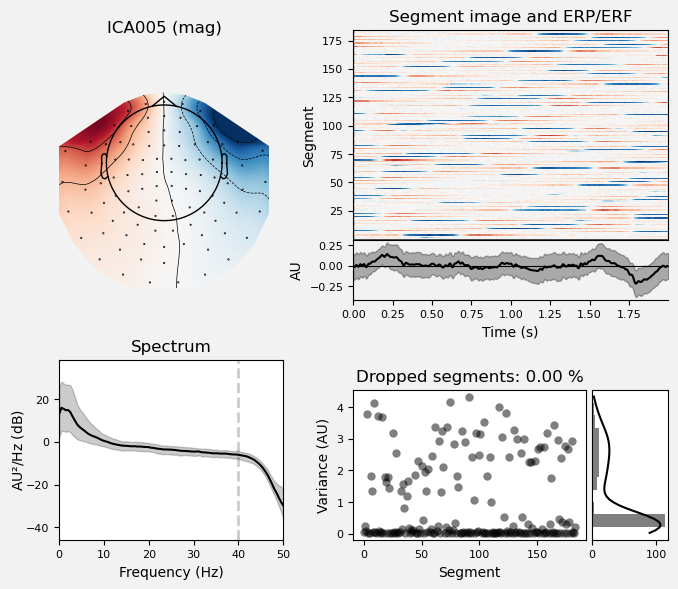

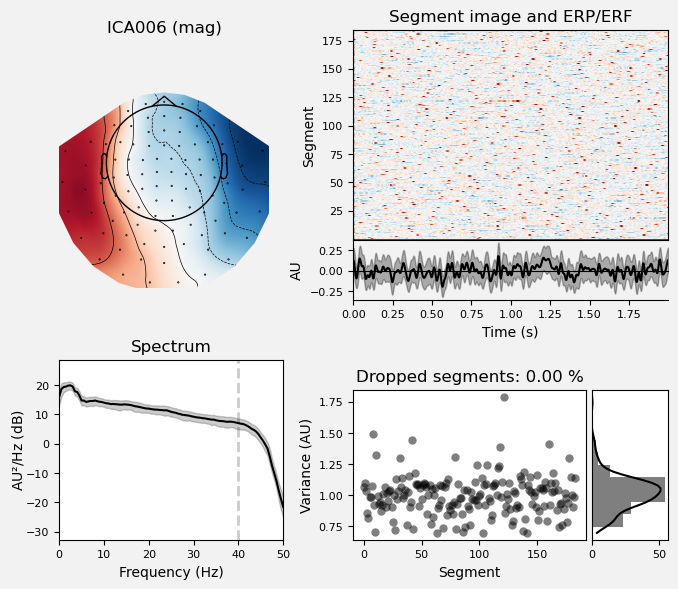

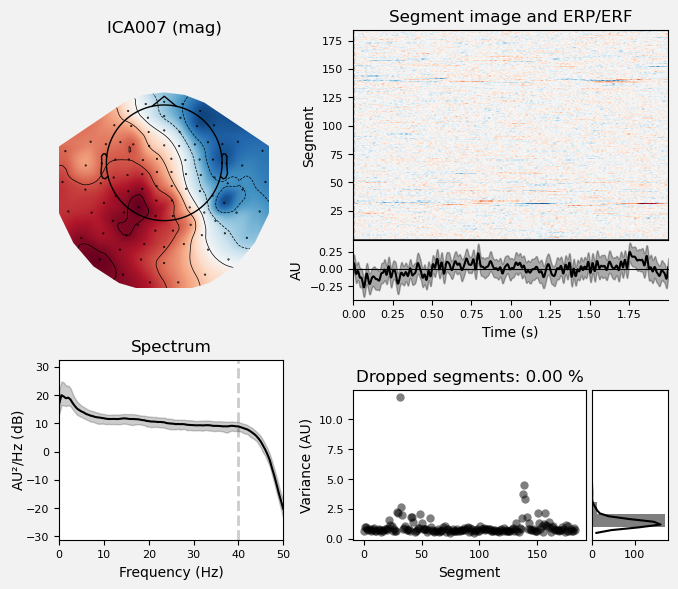

In [3]:
with open('../info_files/session_info.txt', 'r') as f:
    file = f.read()
    session_info = json.loads(file)

info_ses = session_info[session + '.fif']['noise_components']
noise_components = info_ses

ica.plot_properties(filt_raw, picks = noise_components);

In [4]:
ica.exclude = noise_components
ica.apply(filt_raw)

Applying ICA to Raw instance
    Transforming to ICA space (302 components)
    Zeroing out 3 ICA components
    Projecting back using 302 PCA components


<Raw | memory_15.fif, 307 x 368001 (368.0 s), ~867.1 MB, data loaded>

In [ ]:
#filt_raw.save(f'/media/8.1/francescas_data/ica/clean_data_continous_sensor/clean_continuous_sensor_{session}.fif', overwrite = True)

### Epoching

In [5]:
#  creating the epochs for the ICA data
events = mne.find_events(filt_raw, shortest_event=1)
reject = dict(grad=4000e-13, mag=4e-12)  

# event ids
with open('../info_files/event_ids.txt', 'r') as f:
    file = f.read()
    event_ids = json.loads(file)
    
epochs = mne.Epochs(filt_raw, events, event_ids, tmin=0, tmax=1, proj=True, baseline=None, preload=True, reject=reject, on_missing = 'warn')

outpath = f'/media/8.1/final_data/laurap/epochs/{session}-epo.fif'
epochs = epochs.resample(250)
epochs.save(outpath, overwrite = True)

338 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 127 128 192 216 220 222 247
 255]
Not setting metadata
238 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 9)
9 projection items activated
Using data from preloaded Raw for 238 events and 1001 original time points ...
    Rejecting  epoch based on GRAD : ['MEG0113', 'MEG0143', 'MEG0213', 'MEG0243', 'MEG0313', 'MEG0333', 'MEG0343', 'MEG0413', 'MEG0443', 'MEG0533', 'MEG0623', 'MEG0632', 'MEG0643', 'MEG0723', 'MEG0823', 'MEG0932', 'MEG09